In [1]:
import jsonlines
import os
os.chdir("..")

In [2]:
os.getcwd()

'/home/kawshikcvit/coref_research/gpt-coref-met-a6/src'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from omegaconf import OmegaConf
# from config import *
# from utils.utils import *

In [4]:
# dataset_config = OmegaConf.load(dataset_yaml)

In [5]:
met_model = "../models/met_joint_fb2f450ec5de39374b42e26f91f9c27d_lf_s_train_final_runs_1" ### Batch size: 64
# met_d_model = "../models/met_joint_b15694a2cf934ed40cbc210febd3a0ac_lf_d_train_final_runs_1"
coref_model = "../models/coref_joint_336ef98339e98c974c38019915000014_coref_lf_train_final_runs_1"
datasets = ["litbank","fantasy","aft"]

# docname_to_dataset = {}
# datasets_test_files = [get_coref_docs(dataset_config[dataset]["test_file"]) for dataset in datasets]
# for i, dataset in enumerate(datasets):
#     for doc in datasets_test_files[i]:
#         docname_to_dataset[doc] = dataset
# print(docname_to_dataset)

speed_files_met = []
# speed_files_met_d = []
speed_files_coref = []
for dataset in datasets:
    speed_files_met.append(f"{met_model}/{dataset}/test_gold(eval).link.jsonl")
    # speed_files_met_d.append(f"{met_d_model}/{dataset}/test_gold(eval).link.jsonl")
    speed_files_coref.append(f"{coref_model}/{dataset}/test_gold(eval).link.jsonl")

speed_dets_met = []
speed_dets_met_d = []
speed_dets_coref = []

for ind,speed_file in enumerate(speed_files_met):
    with jsonlines.open(speed_file) as reader:
        for obj in reader:
            obj["dataset"] = datasets[ind]
            speed_dets_met.append(obj)

for ind,speed_file in enumerate(speed_files_coref):
    with jsonlines.open(speed_file) as reader:
        for obj in reader:
            obj["dataset"] = datasets[ind]
            speed_dets_coref.append(obj)

# for speed_file in speed_files_met_d:
#     with jsonlines.open(speed_file) as reader:
#         for obj in reader:
#             speed_dets_met_d.append(obj)

speed_dets_coref_df = pd.DataFrame(speed_dets_coref)
speed_dets_met_df = pd.DataFrame(speed_dets_met)
# speed_dets_met_d_df = pd.DataFrame(speed_dets_met_d)

FileNotFoundError: [Errno 2] No such file or directory: '../models/met_joint_fb2f450ec5de39374b42e26f91f9c27d_lf_s_train_final_runs_1/litbank/test_gold(eval).link.jsonl'

In [7]:
bins = [0,100,500,1250,2500]
speed_dets_coref_df['num_mentions_bins'] = pd.cut(speed_dets_coref_df['num_mentions'], bins=bins)
speed_dets_met_df['num_mentions_bins'] = pd.cut(speed_dets_met_df['num_mentions'], bins=bins)

In [8]:
coref_speed_csv = "coref_speed.csv"
met_speed_csv = "met_speed.csv"

speed_dets_coref_df.to_csv(coref_speed_csv)
speed_dets_met_df.to_csv(met_speed_csv)

In [7]:
speed_dets_met_df

,doc_key,num_mentions,link_time,dataset
0,6593_history_of_tom_jones_a_foundling_brat_0,219,0.005225,litbank
1,271_black_beauty_brat_0,350,0.008214,litbank
2,730_oliver_twist_brat_0,226,0.006007,litbank
3,16357_mary_a_fiction_brat_0,278,0.004606,litbank
4,2807_to_have_and_to_hold_brat_0,316,0.003922,litbank
5,1023_bleak_house_brat_0,256,0.003190,litbank
6,1155_the_secret_adversary_brat_0,290,0.004685,litbank
7,238_dear_enemy_brat_0,328,0.005455,litbank
8,1661_the_adventures_of_sherlock_holmes_brat_0,287,0.004613,litbank
9,711_allan_quatermain_brat_0,282,0.004798,litbank


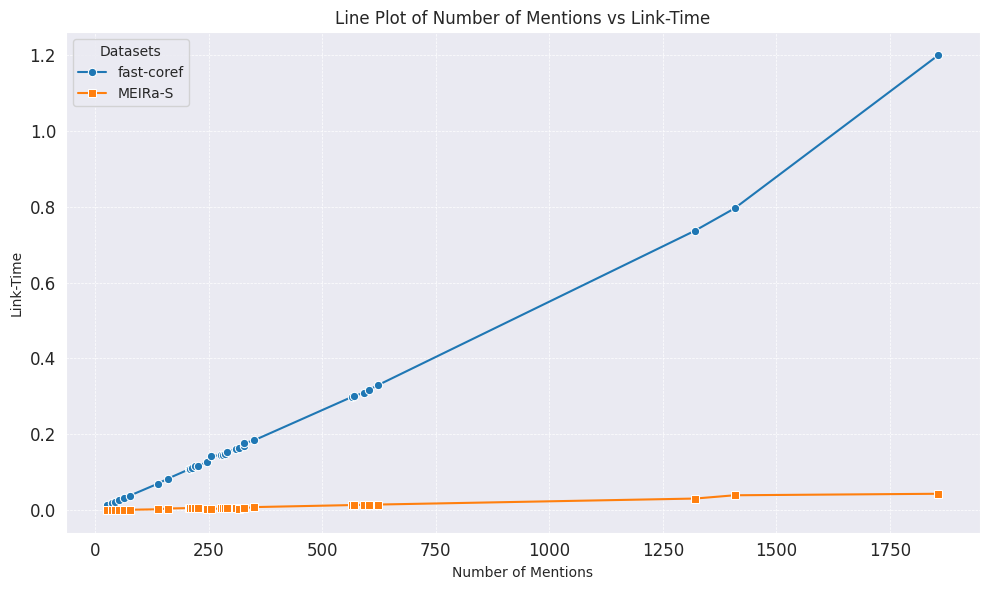

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=speed_dets_coref_df, x='num_mentions', y='link_time', label='fast-coref', marker='o')
sns.lineplot(data=speed_dets_met_df, x='num_mentions', y='link_time', label='MEIRa-S', marker='s')

# Add labels and title
plt.xlabel('Number of Mentions')
plt.ylabel('Link-Time')
plt.title('Line Plot of Number of Mentions vs Link-Time')
plt.legend(title='Datasets')

# Beautify the plot
sns.set_style('darkgrid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

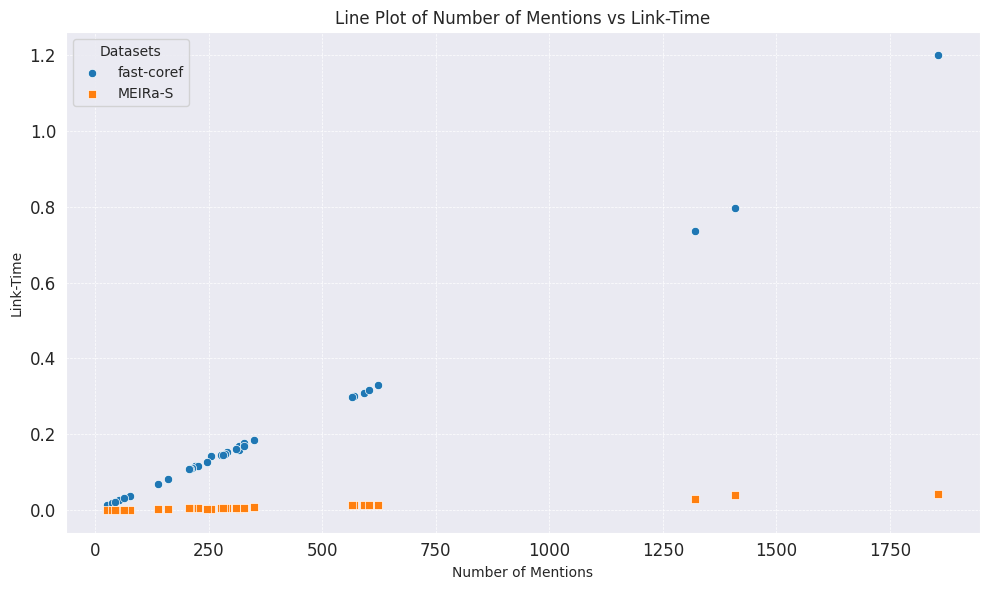

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=speed_dets_coref_df, x='num_mentions', y='link_time', label='fast-coref', marker='o')
sns.scatterplot(data=speed_dets_met_df, x='num_mentions', y='link_time', label='MEIRa-S', marker='s')

# Add labels and title
plt.xlabel('Number of Mentions')
plt.ylabel('Link-Time')
plt.title('Line Plot of Number of Mentions vs Link-Time')
plt.legend(title='Datasets')

# Beautify the plot
sns.set_style('darkgrid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
bins = [0,100,500,1250,2500]
speed_dets_coref_df['num_mentions_bins'] = pd.cut(speed_dets_coref_df['num_mentions'], bins=bins)
speed_dets_met_df['num_mentions_bins'] = pd.cut(speed_dets_met_df['num_mentions'], bins=bins)

In [12]:
speed_dets_coref_df

,doc_key,num_mentions,link_time,dataset,num_mentions_bins
0,6593_history_of_tom_jones_a_foundling_brat_0,219,0.117025,litbank,"(100, 500]"
1,271_black_beauty_brat_0,350,0.184199,litbank,"(100, 500]"
2,730_oliver_twist_brat_0,226,0.117596,litbank,"(100, 500]"
3,16357_mary_a_fiction_brat_0,278,0.144291,litbank,"(100, 500]"
4,2807_to_have_and_to_hold_brat_0,316,0.170432,litbank,"(100, 500]"
5,1023_bleak_house_brat_0,256,0.143715,litbank,"(100, 500]"
6,1155_the_secret_adversary_brat_0,290,0.152396,litbank,"(100, 500]"
7,238_dear_enemy_brat_0,328,0.176533,litbank,"(100, 500]"
8,1661_the_adventures_of_sherlock_holmes_brat_0,287,0.148578,litbank,"(100, 500]"
9,711_allan_quatermain_brat_0,282,0.146328,litbank,"(100, 500]"


In [22]:
sns.palettes.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

[0.0008281866709391276, 0.004911560761301141, 0.014088153839111328, 0.03783098856608073]


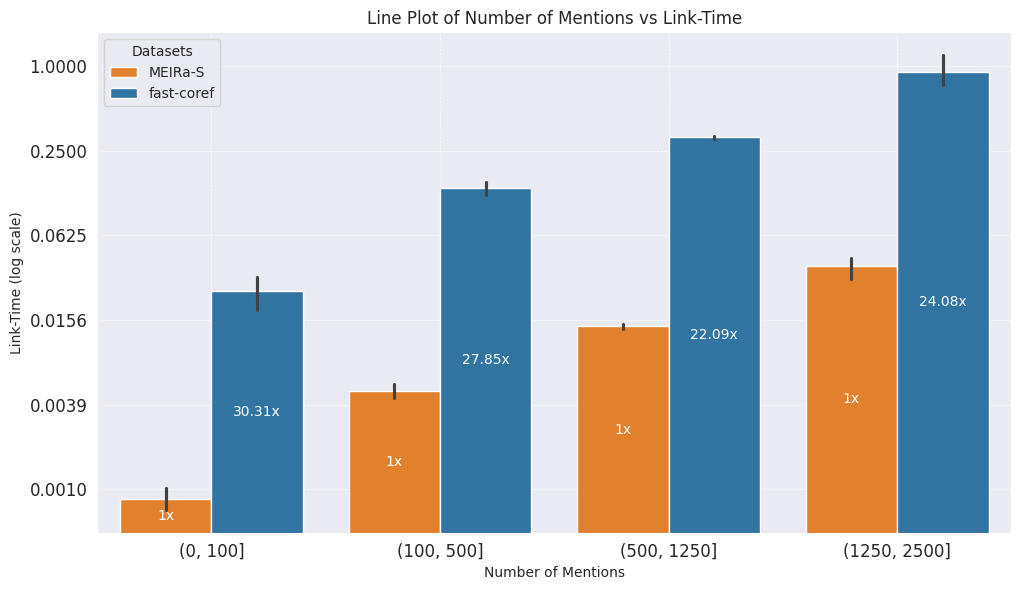

In [32]:
## Merge speed_dets_coref_df and speed_dets_met_df and create "method" column
speed_dets_coref_df['method'] = 'fast-coref'
speed_dets_met_df['method'] = 'MEIRa-S'
## Merge
speed_dets = pd.concat([speed_dets_coref_df,speed_dets_met_df])

plt.figure(figsize=(10, 6))

# Define the order of categories
hue_order = ['MEIRa-S', 'fast-coref']
palette = [sns.palettes.color_palette()[1],sns.palettes.color_palette()[0]]

# Beautify the plot
sns.set_style('darkgrid')

barplot = sns.barplot(data=speed_dets, x='num_mentions_bins', y='link_time', hue='method',hue_order=hue_order,palette=palette)

# Annotate the bars inside the bar
prev_bar_heights = None
for container_ind,container in enumerate(barplot.containers):
    if container_ind % 2 == 0:
        barplot.bar_label(container, labels=[f'1x' for v in container], label_type='center', color='white', fontsize=10)
        prev_bar_heights = [v.get_height() for v in container]
    else:
        print(prev_bar_heights)
        # barplot.bar_label(container, labels=[f'{v.get_height():.2f}x' for v in container], label_type='center', color='white', fontsize=10)
        barplot.bar_label(container, labels=[f'{v.get_height()/prev_bar_heights[v_ind]:.2f}x' for v_ind,v in enumerate(container)], label_type='center', color='white', fontsize=10)

# Add labels and title
plt.xlabel('Number of Mentions')
plt.ylabel('Link-Time (log scale)')
plt.title('Line Plot of Number of Mentions vs Link-Time')
plt.legend(title='Datasets')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Apply logarithmic scale to y-axis
plt.yscale('log',base=2)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))

# Show the plot
plt.show()

In [10]:
!pip install --upgrade nbformat

In [15]:
import plotly.express as px
fig = px.line_polar(speed_dets_coref_df, r='link_time', theta='num_mentions', line_close=False)
# fig = px.line_polar(speed_dets_met_df, r='link_time', theta='num_mentions', line_close=False)
fig.show()

In [14]:
speedup_dets = []
speed_dets_coref = sorted(speed_dets_coref,key=lambda x: x["doc_key"])
speed_dets_met = sorted(speed_dets_met,key=lambda x: x["doc_key"])
for speed_det_ind,speed_det in enumerate(speed_dets_coref):
    doc_key = speed_det["doc_key"]
    speed_up = speed_det["link_time"] / speed_dets_met[speed_det_ind]["link_time"]
    speedup_det = {
        "doc_key": doc_key,
        "dataset": speed_det["dataset"],
        "speed_up": speed_up
    }
    speedup_dets.append(speedup_det)
speedup_dets_df = pd.DataFrame(speedup_dets)
speedup_dets_df

,doc_key,dataset,speed_up
0,"001_The_Frog-King,_or_Iron_Henry_0",fantasy,35.019066
1,008_The_Wonderful_Musician_0,fantasy,18.642258
2,031_The_Girl_Without_Hands_0,fantasy,22.276751
3,039_The_Elves_0,fantasy,20.141702
4,042_The_Godfather_0,fantasy,28.767947
5,045_Thumbling_as_Journeyman_0,fantasy,30.393012
6,059_Frederick_and_Catherine_0,fantasy,22.076274
7,074_The_Fox_and_His_Cousin_0,fantasy,31.401020
8,1023_bleak_house_brat_0,litbank,45.051121
9,109_The_Shroud_0,fantasy,37.994560


<Axes: xlabel='dataset', ylabel='speed_up'>

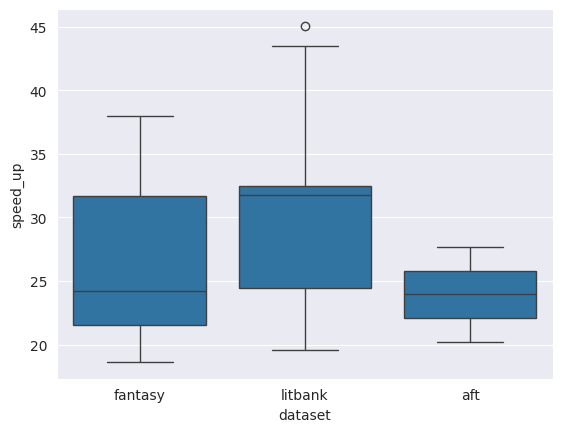

In [15]:
sns.boxplot(x="dataset", y="speed_up", data=speedup_dets_df)

In [30]:
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=speed_dets_coref_df, x='num_mentions', y='link_time', label='fast-coref', marker='o')
# sns.lineplot(data=speed_dets_met_df, x='num_mentions', y='link_time', label='MEIRa-S', marker='s')
# sns.lineplot(data=speed_dets_met_d_df, x='num_mentions', y='link_time', label='MEIRa-D', marker='v')

# # Add labels and title
# plt.xlabel('Number of Mentions')
# plt.ylabel('Link-Time')
# plt.title('Line Plot of Number of Mentions vs Link-Time')
# plt.legend(title='Datasets')

# # Beautify the plot
# sns.set_style('darkgrid')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()

# # Show the plot
# plt.show()